# 02. 자연어 처리 (NLP)
> 순환신경망의 가장 큰 응용분야인 자연어처리(NLP)에 대해 알아보고 실습해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 7]
- permalink: /nlp
- exec: colab

자연어 처리에서 크롤링 등으로 얻어낸 데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) & 정제(cleaning) & 정규화(normalization)등의 작업을 수행하게 됩니다. 본 강의에서는 시간관계상 토큰화에 대해서만 자세히 배우도록 합니다. <br><br>

정제와 정규화에 대해서 간략하게만 말씀드리자면, 정제(cleaning)의 경우 필요 없는 단어를 지우는 작업입니다. 가령 느낌표나 물음표나 숫자 등 의미가 적은 단어 혹은 그러한 글자를 지우는 작업을 말합니다. 정규화는 같은 의미의 두 단어를 하나로 만드는 작업입니다. 가령 Banana와 banana는 같지만 다른 유니코드 값을 가지기 때문에 다른 단어로 취급됩니다. 한국어의 경우 '교수님이'와 '교수님은'는 사실상 같은 단어지만 다른 단어로 취급됩니다. 이러한 단어들 소문자로 만들거나 조사를 떼는 등의 작업을 통해 같은 의미의 단어를 같은 벡터로 통일시키는 것을 정규화라고 합니다. 
<br><br>

### 1. 토큰화
주어진 데이터(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부릅니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다. <br><br>

이 챕터에서는 토큰화에 대한 발생할 수 있는 여러가지 상황에 대해서 언급하여 토큰화에 대한 개념을 이해합니다. 뒤에서 파이썬과 NLTK 패키지, KoNLPY를 통해 실습을 진행하며 직접 토큰화를 수행해보겠습니다. <br><br>

#### 1.1. 단어 토큰화 

토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 합니다. 다만, 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 합니다. <br><br>

예를 들어보겠습니다. 아래의 입력으로부터 구두점(punctuation)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업을 해봅시다. 구두점이란, 온점(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등과 같은 기호를 말합니다.<br><br>

입력: Time is an illusion. Lunchtime double so!<br><br>

이러한 입력으로부터 구두점을 제외시킨 토큰화 작업의 결과는 다음과 같습니다.<br><br>

출력 : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"<br><br>

이 예제에서 토큰화 작업은 굉장히 간단합니다. 구두점을 지운 뒤에 띄어쓰기(whitespace)를 기준으로 잘라냈습니다. 하지만 이 예제는 토큰화의 가장 기초적인 예제를 보여준 것에 불과합니다.<br><br>

보통 토큰화 작업은 단순히 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않습니다. 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생하기도 합니다. 심지어 띄어쓰기 단위로 자르면 사실상 단어 토큰이 구분되는 영어와 달리, 한국어는 띄어쓰기만으로는 단어 토큰을 구분하기 어렵습니다. 그 이유는 뒤에서 언급하도록 하겠습니다.<br><br>

#### 1.2. 토큰화 중 생기는 선택의 순간

토큰화를 하다보면, 예상하지 못한 경우가 있어서 토큰화의 기준을 생각해봐야 하는 경우가 발생합니다. 물론, 이러한 선택은 해당 데이터를 가지고 어떤 용도로 사용할 것인지에 따라, 그 용도에 영향이 없는 기준으로 정하면 됩니다. 예를 들어 영어권 언어에서 어퍼스트로피(')가 들어가있는 단어는 어떻게 토큰으로 분류해야할까라는 문제를 보여드리겠습니다.
<br><br>

예를 들어봅시다.
- Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.

어퍼스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있을까요?

- Don't
- Don t
- Dont
- Do n't
- Jone's
- Jone s
- Jone
- Jones
<br><br>

원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있겠지만, 기존에 공개된 도구들을 사용하였을 때의 결과가 사용자의 목적과 일치한다면 해당 도구를 사용할 수도 있을 것입니다. NLTK는 영어 데이터를 토큰화하기 위한 도구들을 제공합니다. 그 중 word_tokenize와 WordPunctTokenizer를 사용해서 NLTK에서는 어퍼스트로피를 어떻게 처리하는지 확인해보겠습니다.



In [1]:
import nltk
from nltk.tokenize import word_tokenize  

nltk.download('punkt')
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.")) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다. 그렇다면, wordPunctTokenizer는 어퍼스트로피가 들어간 데이터를 어떻게 처리할까요?

In [2]:
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다. <br><br>

텐서플로우 또한 토큰화 도구로서 text_to_word_sequence를 지원합니다. 이번에는 텐서플로우로 토큰화를 수행해봅시다.

In [3]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


텐서플로우의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 온점이나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 어퍼스트로피는 보존하는 것을 볼 수 있습니다.

<br>

#### 1.3. 토큰화에서 고려해야할 사항

토큰화 작업을 단순하게 데이터에서 구두점을 제외하고 공백 기준으로 잘라내는 작업이라고 간주할 수는 없습니다. 이러한 일은 보다 섬세한 알고리즘이 필요한데, 왜 섬세해야하는지 지금부터 그 이유를 정리해봅니다.
<br><br>

- 1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.

갖고있는 데이터에서 단어들을 걸러낼 때, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않습니다. 데이터에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 합니다. 가장 기본적인 예를 들어보자면, 온점(.)과 같은 경우는 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 온점(.)을 제외하지 않을 수 있습니다.
<br><br>

또 다른 예를 들어보면, 단어 자체에서 구두점을 갖고 있는 경우도 있는데, m.p.h나 Ph.D나 AT&T 같은 경우가 있습니다. 또 특수 문자의 달러()나 슬래시(/)로 예를 들어보면, 45.55와 같은 가격을 의미 하기도 하고, 01/02/06은 날짜를 의미하기도 합니다. 보통 이런 경우 45.55를 하나로 취급해야하지, 45와 55로 따로 분류하고 싶지는 않을 것입니다.
<br><br>

숫자 사이에 컴마(,)가 들어가는 경우도 있습니다. 가령 보통 수치를 표현할 때는 123,456,789와 같이 세 자리 단위로 컴마가 들어갑니다.
<br><br>

- 2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.

토큰화 작업에서 종종 영어권 언어의 아포스트로피(')는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를 들어 what're는 what are의 줄임말이며, we're는 we are의 줄임말입니다. 위의 예에서 re를 접어(clitic)이라고 합니다. 즉, 단어가 줄임말로 쓰일 때 생기는 형태를 말합니다. 가령 I am을 줄인 I'm이 있을 때, m을 접어라고 합니다.

New York이라는 단어나 rock 'n' roll이라는 단어를 봅시다. 이 단어들은 하나의 단어이지만 중간에 띄어쓰기가 존재합니다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에도 하나의 토큰으로 봐야하는 경우도 있을 수 있으므로, 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야합니다.
<br><br>

- 3) 표준 토큰화 예제

이해를 돕기 위해, 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙에 대해서 소개하고, 토큰화의 결과를 보도록 하겠습니다.

규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
규칙 2. doesn't와 같이 어퍼스트로피로 '접어'가 함께하는 단어는 분리해준다.

해당 표준에 아래의 문장을 input으로 넣어봅니다.

"Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

#### 1.4. 한국어에서의 토큰화의 어려움.

영어는 New York과 같은 합성어나 he's 와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동합니다. 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화와 단어 토큰화가 거의 같기 때문입니다. <br><br>

하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족합니다. 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데 즉, 어절 토큰화는 한국어 NLP에서 지양되고 있습니다. 어절 토큰화와 단어 토큰화가 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말합니다. <br><br>

- 1) 한국어는 교착어이다.

좀 더 자세히 설명하기 전에 간단한 예를 들어 봅시다. 영어와는 달리 한국어에는 조사라는 것이 존재합니다. 예를 들어, 그(he/him)라는 주어나 목적어가 들어간 문장이 있다고 합시다. 이 경우, 그라는 단어 하나에도 '그가', '그에게', '그를', '그와', '그는'과 같이 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게됩니다. 자연어 처리를 하다보면 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많습니다. 대부분의 한국어 NLP에서 조사는 분리해줄 필요가 있습니다.
<br><br>

즉, 띄어쓰기 단위가 영어처럼 독립적인 단어라면 띄어쓰기 단위로 토큰화를 하면 되겠지만 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 한다는 의미입니다.
<br><br>

좀 더 자세히 설명해보겠습니다. 한국어 토큰화에서는 형태소(morpheme)란 개념을 반드시 이해해야 합니다. 형태소(morpheme)란 뜻을 가진 가장 작은 말의 단위를 말합니다. 이 형태소에는 두 가지 형태소가 있는데 자립 형태소와 의존 형태소입니다.
<br><br>

- 자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
- 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간를 말한다.
<br><br>

예를 들어 다음과 같은 문장이 있다고 합시다.

- 문장 : 에디가 딥러닝책을 읽었다

이를 형태소 단위로 분해하면 다음과 같습니다.

- 자립 형태소 : 에디, 딥러닝책
- 의존 형태소 : -가, -을, 읽-, -었, -다

이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화를 수행해야한다는 겁니다.
<br><br>

- 2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

사용하는 한국어 데이터가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력하는 글이라면 좋겠지만, 많은 경우에 띄어쓰기가 틀렸거나, 지켜지지 않는 데이터가 많습니다.
<br><br>

한국어는 영어권 언어와 비교하여 띄어쓰기가 어렵고, 또 잘 지켜지지 않는 경향이 있습니다. 그 이유는 여러 견해가 있으나, 가장 기본적인 견해는 한국어의 경우 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있는 언어라는 점입니다. 사실, 띄어쓰기가 없던 한국어에 띄어쓰기가 보편화된 것도 근대(1933년, 한글맞춤법통일안)의 일입니다.<br><br>

EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.

EX2) Tobeornottobethatisthequestion

반면, 영어의 경우에는 띄어쓰기를 하지 않으면 손쉽게 알아보기 어려운 문장들이 생깁니다. 이는 한국어(모아쓰기 방식)와 영어(풀어쓰기 방식)라는 언어적 특성의 차이에 기인합니다. 이 책에서는 모아쓰기와 풀어쓰기에 대한 설명은 생략하겠으나, 결론은 한국어는 수많은 데이터에서 띄어쓰기가 무시되는 경우가 많아 자연어 처리가 어려워졌다는 것입니다. <br><br>

NLTK에서는 영어 데이터셋에 대한 품사 태깅 기능을 지원하고 있습니다. 품사를 어떻게 명명하고, 태깅하는지의 기준은 여러가지가 있는데, NLTK에서는 Penn Treebank POS Tags라는 기준을 사용합니다. 실제로 NLTK를 사용해서 영어 데이터셋에 품사 태깅을 해보도록 하겠습니다.

In [4]:
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
from nltk.tag import pos_tag
x=word_tokenize(text)
pos_tag(x)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

영어 문장에 대해서 토큰화를 수행하고, 이어서 품사 태깅을 수행하였습니다. Penn Treebank POG Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미합니다.
<br><br>

한국어 자연어 처리를 위해서는 KoNLPy("코엔엘파이"라고 읽습니다)라는 파이썬 패키지를 사용할 수 있습니다. 코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.
<br><br>

한국어 NLP에서 형태소 분석기를 사용한다는 것은 단어 토큰화가 아니라 정확히는 형태소(morpheme) 단위로 형태소 토큰화(morpheme tokenization)를 수행하게 됨을 뜻합니다. 여기선 이 중에서 Okt와 꼬꼬마를 통해서 토큰화를 수행해보도록 하겠습니다. (Okt는 기존에는 Twitter라는 이름을 갖고있었으나 0.5.0 버전부터 이름이 변경되어 인터넷에는 아직 Twitter로 많이 알려져있으므로 학습 시 참고바랍니다.)
<br><br>


In [7]:
!apt-get install openjdk-8-jdk 
!pip install konlpy
# 설치해주세요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 MB of archives.
After this operation,

In [8]:
from konlpy.tag import Okt  

okt=Okt() 
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [9]:
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [10]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


위의 예제는 Okt 형태소 분석기로 토큰화를 시도해본 예제입니다.

- 1) morphs : 형태소 추출
- 2) pos : 품사 태깅(Part-of-speech tagging)
- 3) nouns : 명사 추출

<br>

위 예제에서 사용된 각 메소드는 이런 기능을 갖고 있습니다. 앞서 언급한 코엔엘파이의 형태소 분석기들은 공통적으로 이 메소드들을 제공하고 있습니다. 위 예제에서 형태소 추출과 품사 태깅 메소드의 결과를 보면, 조사를 기본적으로 분리하고 있음을 확인할 수 있습니다. 그렇기 때문에 한국어 NLP에서 전처리에 형태소 분석기를 사용하는 것은 꽤 유용합니다.
<br><br>

이번에는 꼬꼬마 형태소 분석기를 사용하여 같은 문장에 대해서 토큰화를 진행해볼 것입니다.

In [11]:
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [12]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [13]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


앞서 사용한 Okt 형태소 분석기와 결과가 다른 것을 볼 수 있습니다. 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 

### 2. 불용어(Stopword)

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다. 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말합니다. 예를 들면, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있습니다. 이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다.
<br><br>

물론 불용어는 개발자가 직접 정의할 수도 있습니다. 이번 챕터에서는 영어 문장에서 NLTK가 정의한 영어 불용어를 제거하는 실습을 하고, 한국어 문장에서 직접 정의한 불용어를 제거해보겠습니다.
<br><br>

NLTK 실습에서는 1챕터에서 언급했듯이 NLTK Data가 필요합니다. 만약, 데이터가 없다는 에러가 발생 시에는 nltk.download(필요한 데이터)라는 커맨드를 통해 다운로드 할 수 있습니다. 해당 커맨드 또한 에러가 발생할 경우 1챕터의 NLTK Data 가이드를 참고 바랍니다.
<br><br>

#### 2.1. NLTK에서 불용어 확인하기

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

stopwords.words("english")는 NLTK가 정의한 영어 불용어 리스트를 리턴합니다. 출력 결과가 100개 이상이기 때문에 여기서는 간단히 10개만 확인해보았습니다. 'i', 'me', 'my'와 같은 단어들을 NLTK에서 불용어로 정의하고 있음을 확인할 수 있습니다.

#### 2.2. NLTK를 통해서 불용어 제거하기

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens) 
print()
print(result) 

위 코드는 "Family is not an important thing. It's everything."라는 임의의 문장을 정의하고, NLTK가 정의하고 있는 불용어를 제외한 결과를 출력하고 있습니다. 'is', 'not', 'an'과 같은 단어들이 문장에서 제거되었음을 볼 수 있습니다.

<br>

#### 2.3. 한국어에서 불용어 제거하기

한국어에서 불용어를 제거하는 방법으로는 간단하게는 토큰화 후에 조사, 접속사 등을 제거하는 방법이 있습니다. 하지만 불용어를 제거하려고 하다보면 조사나 접속사와 같은 단어들뿐만 아니라 명사, 형용사와 같은 단어들 중에서 불용어로서 제거하고 싶은 단어들이 생기기도 합니다. 결국에는 사용자가 직접 불용어 사전을 만들게 되는 경우가 많습니다. 이번에는 직접 불용어를 정의해보고, 주어진 문장으로부터 직접 정의한 불용어 사전을 참고로 불용어를 제거해보겠습니다.

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print()
print(result)

아래의 링크는 보편적으로 선택할 수 있는 한국어 불용어 리스트를 보여줍니다. (여전히 절대적인 기준은 아닙니다.) 한국어 불용어를 제거하는 더 좋은 방법은 코드 내에서 직접 정의하지 않고 txt 파일이나 csv 파일로 수많은 불용어를 정리해놓고, 이를 불러와서 사용하는 방법입니다.

<br>

### 3. 워드 임베딩

자연어를 컴퓨터가 이해하고, 효율적으로 처리하게 하기 위해서는 컴퓨터가 이해할 수 있도록 자연어를 적절히 변환할 필요가 있습니다. 단어를 표현하는 방법에 따라서 자연어 처리의 성능이 크게 달라지기 때문에 이에 대한 많은 연구가 있었고, 여러가지 방법들이 알려져 있습니다. <br><br>

최근에는 단어의 의미를 벡터화시킬 수 있는 이번 챕터에서 배우게 될 워드투벡터(Word2Vec)가 많이 사용되고 있습니다. 이번 챕터에서는 전통적 방법의 한계를 개선시킨 워드 임베딩(Word Embedding) 방법론에 대해서 배워보도록 하겠습니다.



<br>

#### 3.1. 희소 표현(Sparse Representation)

앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다. <br><br>

이러한 희소 벡터의 문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점입니다. 원-핫 벡터로 표현할 때는 갖고 있는 코퍼스에 단어가 10,000개였다면 벡터의 차원은 10,000이어야만 했습니다. 심지어 그 중에서 단어의 인덱스에 해당되는 부분만 1이고 나머지는 0의 값을 가져야만 했습니다. 단어 집합이 클수록 고차원의 벡터가 됩니다. 예를 들어 단어가 10,000개 있고 강아지란 단어의 인덱스는 5였다면 원 핫 벡터는 이렇게 표현되어야 했습니다.

<br>

- Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개.

<br>

이러한 벡터 표현은 공간적 낭비를 불러일으킵니다. 잘 생각해보면, 공간적 낭비를 일으키는 것은 원-핫 벡터뿐만은 아닙니다. 희소 표현의 일종인 DTM과 같은 경우에도 특정 문서에 여러 단어가 다수 등장하였으나, 다른 많은 문서에서는 해당 특정 문서에 등장했던 단어들이 전부 등장하지 않는다면 역시나 행렬의 많은 값이 0이 되면서 공간적 낭비를 일으킵니다. 뿐만 아니라, 원-핫 벡터는 단어의 의미를 담지 못한다는 단점을 갖고있습니다.
<br><br>

#### 3.2. 밀집 표현 (Dense Representation)

이러한 희소 표현과 반대되는 표현이 있으니, 이를 밀집 표현(dense representation)이라고 합니다. 밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않습니다. 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됩니다. 다시 희소 표현의 예를 가져와봅시다.
<br><br>

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개. 차원은 10,000
<br><br>

예를 들어 10,000개의 단어가 있을 때 강아지란 단어를 표현하기 위해서는 위와 같은 표현을 사용했습니다. 하지만 밀집 표현을 사용하고, 사용자가 밀집 표현의 차원을 128로 설정한다면, 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됩니다.
<br><br>

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128
<br><br>

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 합니다.

#### 3.3. 워드 임베딩(Word Embedding)

단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 합니다. 그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 합니다.
<br><br>

워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 텐서플로우에서 제공하는 도구인 Embedding()는 앞서 언급한 방법들을 사용하지는 않지만, 단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용합니다. 아래의 표는 앞서 배운 원-핫 벡터와 지금 배우고 있는 임베딩 벡터의 차이를 보여줍니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day7/04.png?raw=true)

<br>

### 4. Word2Vec

앞서 원-핫 인코딩 챕터에서 원-핫 벡터는 단어 간 유사도를 계산할 수 없다는 단점이 있음을 언급한 적이 있습니다. 그래서 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 할 수 있는 방법이 필요합니다. 그리고 이를 위해서 사용되는 대표적인 방법이 워드투벡터(Word2Vec)입니다. Word2Vec의 개념을 설명하기에 앞서, Word2Vec가 어떤 일을 할 수 있는지 먼저 확인해보겠습니다.

![](https://wikidocs.net/images/page/22660/word2vec.PNG)
<br><br>

위 사이트(https://word2vec.kr/search/) 는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트입니다. 위 사이트에서는 단어들(실제로는 Word2Vec 벡터)로 더하기, 빼기 연산을 할 수 있습니다. 예를 들어 아래의 식에서 좌변을 집어 넣으면, 우변의 답들이 나옵니다. 
<br><br>

- 고양이 + 애교 = 강아지
- 한국 - 서울 + 도쿄 = 일본
- 박찬호 - 야구 + 축구 = 호나우두
<br><br>

신기하게도 단어가 가지고 있는 어떤 의미들을 가지고 연산을 하고 있는 것처럼 보입니다. 이런 연산이 가능한 이유는 각 단어 벡터가 단어 간 유사도를 반영한 값을 가지고 있기 때문입니다. 어떻게 이런 일이 가능한 것일까요?
<br><br>

#### 4.1. CBOW (Continous Bag of Words)

Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있습니다. CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 메커니즘 자체는 거의 동일하기 때문에 CBOW를 이해한다면 Skip-Gram도 손쉽게 이해 가능합니다. 우선 CBOW에 대해서 알아보도록 하겠습니다. 이해를 위해 매우 간소화 된 형태의 CBOW로 설명합니다.
<br><br>

예문 : "The fat cat sat on the mat"
예를 들어서 갖고 있는 코퍼스에 위와 같은 문장이 있다고 합시다. 가운데 단어를 예측하는 것이 CBOW라고 했습니다. {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일입니다. 이 때 예측해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)라고 합니다.
<br><br>

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)라고 합니다. 예를 들어서 윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고합니다. 윈도우 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 될 것입니다.
<br><br>

![](https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG)

<br>

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 합니다.
<br><br>

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Wo)rd2Vec에서 입력은 모두 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 위 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다. <br><br>

![](https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG)

CBOW의 인공 신경망을 간단히 도식화하면 위와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요합니다. 뒤에서 설명하겠지만, Word2Vec의 학습을 위해서 이 중간 단어의 원-핫 벡터가 필요합니다.
<br><br>

또한 위 그림에서 알 수 있는 사실은, Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니라는 점입니다. 보통 딥 러닝이라함은, 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망을 학습할 때를 말하는데 Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재합니다. 이렇게 은닉층(hidden Layer)이 1개인 경우에는 일반적으로 심층신경망(Deep Neural Network)이 아니라 얕은신경망(Shallow Neural Network)이라고 부릅니다. 또한 Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 합니다.<br><br>

![](https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG)

CBOW의 인공 신경망을 좀 더 확대하여, 동작 메커니즘에 대해서 상세하게 알아보도록 하겠습니다. 이 그림에서 주목해야할 것은 두 가지 입니다. 하나는 투사층의 크기가 M이라는 점입니다. CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위의 그림에서 투사층의 크기는 M=5이기 때문에 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될 것입니다.
<br><br>

두번째는 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이라는 점입니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것입니다. 주의할 점은 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이라는 점입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조입니다.
<br><br>

![](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)
입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서는 각 주변 단어의 원-핫 벡터를 x로 표기하였습니다. 입력 벡터는 원-핫 벡터입니다. i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 그래서 이 작업을 룩업 테이블(lookup table)이라고 부릅니다. 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문입니다.

![](https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG)

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됩니다. 만약 윈도우 크기 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됩니다. 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됩니다. 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 합니다. 뒤에서 보게되겠지만, Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않습니다.

![](https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG)

이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옵니다. 만약 입력 벡터의 차원이 7이었다면 여기서 나오는 벡터도 마찬가지입니다.
<br><br>

이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀝니다. 이렇게 나온 벡터를 스코어 벡터(score vector)라고 합니다. 스코어 벡터의 각 차원 안에서의 값이 의미하는 것은 아래와 같습니다.
<br><br>

스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 합니다. 스코어 벡터를 y^라고 하겠습니다. 중심 단어를 y로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 cross-entropy 함수를 사용합니다.
<br><br>

이제 역전파(Back Propagation)를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 때로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 합니다.


#### 4.2. Skip-gram

Skip-gram은 CBOW를 이해했다면, 메커니즘 자체는 동일하기 때문에 쉽게 이해할 수 있습니다. 앞서 CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측하려고 합니다.

![](https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG)

앞서 언급한 동일한 예문에 대해서 인공 신경망을 도식화해보면 위와 같습니다. 이제 중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없습니다.
<br><br>

여러 논문에서 성능 비교를 진행했을 때, 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.

<br>

#### 4.3. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [15]:
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fe689e7c940>)

In [17]:
train_data = pd.read_table('ratings.txt')

In [18]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [19]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [20]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [21]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [22]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [23]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰레기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [25]:
train_data = train_data.sample(frac=1.0)
train_data # 데이터프레임 셔플

,id,document,label
115092,7168763,포스터에 왜 어메이징스파이더맨을 집어넣은걸까 난또 감독인줄,0
64779,9493317,평점 점 솔직히 개 어그로 아님 이거 개꿀잼인뎅 씹 개오지고 스토리 보다가 콧물 ...,1
149429,8805970,우와 장애인도 만든다는 영화다 우와,0
10932,573463,선과악의 경계를 허문 최고의 서부영화중하나다,1
172994,3889256,점점에점 진짜 싫다,0
...,...,...,...
178827,4741026,잔 웃음,0
53923,7944714,그에게 필요한 것은 사랑과 사과 그것은 나에게도 필요했던 것,1
64677,10210754,최고엿고 최고엿다,1
100884,6569823,점도 아까운 점수 기분 구려지는 영화 마지막 까지 뭘 기대하고 본건지 정말 비추입니다,0


In [26]:
# colab 메모리 부족으로 인해 데이터의 1/3만 사용합니다.

train_data = train_data[:int(len(train_data) / 3)]

In [27]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [28]:
# 한국어 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for i, sentence in enumerate(train_data['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    
    if i % 1000 == 0:
        print('.', end='')

print('FIN.')

..................................................................FIN.


리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.650561022440897


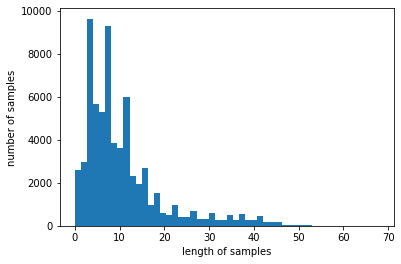

In [29]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

모든 configuration은 아래에 설정합니다.

In [30]:
vector_size = 128
max_len = 32

In [31]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=tokenized_data, 
                     size=vector_size, 
                     window=5, 
                     min_count=3, 
                     workers=4, 
                     sg=0, 
                     iter=25)

In [32]:
# 완성된 임베딩 매트릭스의 크기 확인
w2v_model.wv.vectors.shape

(12760, 128)

In [40]:
print(w2v_model.wv.most_similar("한석규"))

[('유해진', 0.6868371963500977), ('강지환', 0.6728814840316772), ('설경구', 0.6589284539222717), ('최민식', 0.6495556831359863), ('조인성', 0.6436001658439636), ('감초', 0.6335883140563965), ('김혜수', 0.6326616406440735), ('김해숙', 0.6319696307182312), ('장혁', 0.628457248210907), ('조진웅', 0.6264230012893677)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [41]:
print(w2v_model.wv.most_similar("스릴러"))

[('멜로', 0.6695731282234192), ('장르', 0.6568633913993835), ('공포', 0.6216366291046143), ('액션영화', 0.6085695028305054), ('호러', 0.5988887548446655), ('코미디', 0.5930293202400208), ('미스터리', 0.5790199041366577), ('로맨스', 0.5688817501068115), ('공포영화', 0.5432464480400085), ('코믹', 0.5329892635345459)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [42]:
print(w2v_model.wv.most_similar("ㅋㅋ"))

[('ㅋㅋㅋ', 0.5901170372962952), ('ㅋ', 0.5898222327232361), ('ㅋㅋㅋㅋ', 0.5272934436798096), ('ㅋㅋㅋㅋㅋ', 0.48956987261772156), ('염', 0.45691004395484924), ('ㅎㅎ', 0.4326156675815582), ('ㅋㅋㅋㅋㅋㅋ', 0.4024009108543396), ('ㅋㅋㅋㅋㅋㅋㅋㅋ', 0.39753758907318115), ('진짜사나이', 0.3849674463272095), ('ㅎㅎㅎ', 0.38475868105888367)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


<br>

### 5. 네이버 영화리뷰 감정분류하기

In [36]:
import numpy as np


feature = tokenized_data
label = train_data['label']
dataset = [{'feature':_[0], 'label':_[1]} 
           for _ in zip(feature, label)]

In [37]:
dataset_transform = []
for i, data in enumerate(dataset):
    sentence = []
    for word in data['feature']:
        if word in w2v_model:
            word_vec = w2v_model[word]
        else:
            word_vec = np.ones(vector_size) # OOV
        
        word_vec = np.expand_dims(word_vec, axis=0)
        sentence.append(word_vec)
    
    if len(sentence) > 0:
        sentence = np.concatenate(sentence, axis=0)
        dataset_transform.append({
            'feature':sentence,
            'label':data['label']
        })
    
    if i % 1000 == 0:
        print('.', end='')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


...................................................................

In [38]:
# 패드 시퀀싱

features = []
labels = []

for data in dataset_transform:
    feature = data['feature']
    length = feature.shape[0]
    
    if length > max_len:
        feature = feature[:length]
    
    else:
        pad = np.zeros((max_len, vector_size))
        
        for i in range(length):
            pad[i] = feature[i]
            
        feature = np.expand_dims(pad, axis=0)
        label = np.expand_dims(data['label'], axis=0)
        
        features.append(feature)
        labels.append(label)

feature = np.concatenate(features, axis=0)
label = np.concatenate(labels, axis=0)
print(feature.shape, label.shape)

(62859, 32, 128) (62859,)


In [43]:
split_point = int(0.8 * len(feature))

train_feature, train_label = feature[:split_point], label[:split_point]
test_feature, test_label = feature[split_point:], label[split_point:]

In [44]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
model = Sequential()
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [46]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_sentiment_model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_feature, train_label, epochs=75, callbacks=[es, mc], batch_size=60)

Epoch 1/75
839/839 [==============================] - ETA: 0s - loss: 0.4142 - acc: 0.8149WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc

Epoch 00001: acc improved from -inf to 0.81490, saving model to best_sentiment_model.h5
839/839 [==============================] - 13s 16ms/step - loss: 0.4142 - acc: 0.8149
Epoch 2/75
839/839 [==============================] - ETA: 0s - loss: 0.3643 - acc: 0.8378WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc

Epoch 00002: acc improved from 0.81490 to 0.83779, saving model to best_sentiment_model.h5
839/839 [==============================] - 12s 14ms/step - loss: 0.3643 - acc: 0.8378
Epoch 3/75
837/839 [============================>.] - ETA: 0s - loss: 0.3338 - acc: 0.8529WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc

Epoch 0

In [48]:
loaded_model = load_model('best_sentiment_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_feature, test_label)[1]))

393/393 [==============================] - 3s 7ms/step - loss: 1.1660 - acc: 0.8276

 테스트 정확도: 0.8276


In [49]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    
    sentence_vector = []
    for word in new_sentence:
        if word in w2v_model:
            word_vec = w2v_model[word]
        else:
            word_vec = np.ones(vector_size) # OOV
  
    word_vec = np.expand_dims(word_vec, axis=0)
    sentence_vector.append(word_vec)
    sentence_vector = np.concatenate(sentence_vector, axis=0)
  
    length = sentence_vector.shape[0]

    if length > max_len:
        feature = sentence_vector[:length]
    
    else:
        pad = np.zeros((max_len, vector_size))
        
        for i in range(length):
            pad[i] = sentence_vector[i]
            
        sentence_vector = np.expand_dims(pad, axis=0)

    score = float(loaded_model.predict(sentence_vector)) # 예측
    
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [50]:
sentiment_predict('핵 노잼')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


99.99% 확률로 부정 리뷰입니다.



In [51]:
sentiment_predict('ㅋㅋㅋ 영화 개꿀잼 너무 재밌었음')

98.02% 확률로 긍정 리뷰입니다.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [53]:
sentiment_predict('아니 이딴것도 영화라고 만들었냐')

99.94% 확률로 부정 리뷰입니다.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
